### Normal Distribution function

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad

In [63]:
x=np.linspace(-4,4,100)
x=np.array(x)
np.mean(x)

3.2862601528904633e-16

In [67]:
def normal(x,new_mu=0,sigma=1):
    c=1/(np.sqrt(2*np.pi*(sigma**2)))
    p=c*(np.exp(-(x-new_mu)**2/(2*(sigma**2))))
    return p

In [68]:
normal(x)

array([1.33830226e-04, 1.84295302e-04, 2.52138056e-04, 3.42709873e-04,
       4.62784614e-04, 6.20862299e-04, 8.27514755e-04, 1.09577221e-03,
       1.44154732e-03, 1.88408981e-03, 2.44646147e-03, 3.15601632e-03,
       4.04486639e-03, 5.15030799e-03, 6.51517825e-03, 8.18810653e-03,
       1.02236211e-02, 1.26820683e-02, 1.56292995e-02, 1.91360817e-02,
       2.32771927e-02, 2.81301641e-02, 3.37736510e-02, 4.02854146e-02,
       4.77399263e-02, 5.62056185e-02, 6.57418315e-02, 7.63955298e-02,
       8.81978860e-02, 1.01160853e-01, 1.15273870e-01, 1.30500851e-01,
       1.46777638e-01, 1.64010075e-01, 1.82072870e-01, 2.00809396e-01,
       2.20032535e-01, 2.39526659e-01, 2.59050772e-01, 2.78342808e-01,
       2.97125003e-01, 3.15110210e-01, 3.32008980e-01, 3.47537175e-01,
       3.61423830e-01, 3.73418974e-01, 3.83301094e-01, 3.90883931e-01,
       3.96022313e-01, 3.98616779e-01, 3.98616779e-01, 3.96022313e-01,
       3.90883931e-01, 3.83301094e-01, 3.73418974e-01, 3.61423830e-01,
      

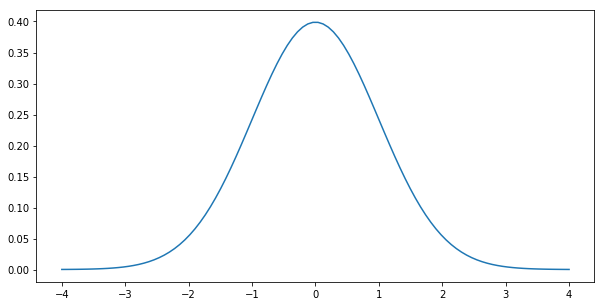

In [69]:
plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ax.plot(x, normal(x))

In [6]:
def percent(x,mu=0,sigma=1):
    z=(x-mu)/sigma
    per,_=quad(normal,np.NINF,z) 
    return per*100

In [7]:
percent(3)

99.86501019683699

In [8]:
def cum_dis(x,mu=0,sigma=1):
    out=[]
    for i in x:
        z=(i-mu)/sigma
        per,_=quad(normal,-z,z)
        out.append(per)
    return out

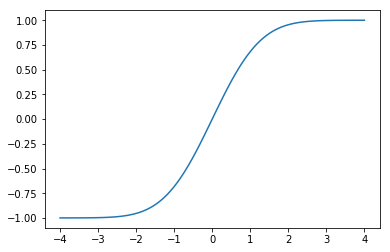

In [9]:
plt.plot(x,cum_dis(x))

In [17]:
class proba(object):
    def __init__(self,mu,sigma):
        self.mu=mu
        self.sigma=sigma
    def __iter__(self):
        # Wanna iterate over a class? Then ask that class for iterator.
        return self.percent()
    def normal(self,x):
        c=1/(np.sqrt(2*np.pi*(self.sigma**2)))
        p=c*(np.exp(-(x-self.mu)**2/(2*(self.sigma**2))))
        return p
    def percent(self):
        x1=input("input the first value")
        x2=input("input the second value")
        z1=(x1-self.mu)/self.sigma
        z2=(x2-self.mu)/self.sigma
        if z1 and z2:
            per,_=quad(normal,z1,z2)
        elif z1:
            per,_=quad(normal,np.NINF,z1) 
        else:
            per,_=quad(normal,z2,np.PNINF)
        return per*100
    def cum_dis(self,x):
        out=[]
        for i in x:
            z=(i-self.mu)/self.sigma
            per,_=quad(normal,-z,z)
            out.append(per)
        return out

In [20]:
call=proba(3,1)
call2=proba(0,2)
call3=proba(0,3)

(-5, 10)

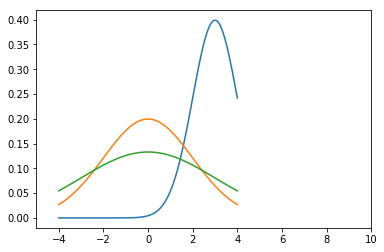

In [22]:
plt.plot(x,call.normal(x))
plt.plot(x,call2.normal(x))
plt.plot(x,call3.normal(x))
plt.xlim(-5,10)

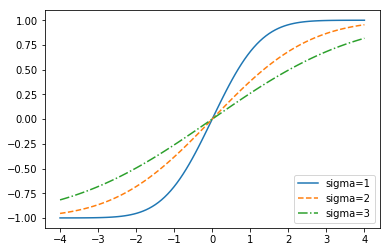

In [91]:
plt.plot(x,call.cum_dis(x),'-',label="sigma=1")
plt.plot(x,call2.cum_dis(x),'--',label="sigma=2")
plt.plot(x,call3.cum_dis(x),'-.',label='sigma=3')
plt.legend(loc=4)